In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Split data into train and test data
from sklearn.model_selection import train_test_split

# Preprocessing:
from sklearn.preprocessing import StandardScaler

# Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# To draw decision tree
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz


from sklearn.datasets import load_iris
import os
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('impacts.csv')

# Data exploration

In [3]:
df.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [4]:
df.describe()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
count,683.000000,683.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2062.573939,2099.680820,43.348463,1.539476e-04,11.462577,26.158272,0.049378,-6.511552,-6.804012
std,43.501694,37.594698,113.773280,2.519607e-03,6.067772,2.388296,0.156403,1.509189,1.476135
min,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.980000,-11.000000
25%,2034.000000,2090.000000,2.000000,1.100000e-07,7.240000,25.000000,0.010000,-7.490000,-7.790000
50%,2061.000000,2109.000000,6.000000,1.700000e-06,10.500000,26.400000,0.017000,-6.460000,-6.790000
75%,2085.000000,2114.000000,29.000000,1.550000e-05,14.810000,27.800000,0.033000,-5.490000,-5.865000
max,2880.000000,2880.000000,1144.000000,6.500000e-02,39.470000,31.600000,2.579000,-1.420000,-1.420000


In [5]:
df.columns = ['obj','Period_start','Period_end','Possible_impacts','C_imp_prob','asteroid_vel','asteroid_mag','asteroid_dia','C_palermo','max_palermo','max_torno']

In [6]:
df['Possible_impacts']. max()

1144

In [7]:
df['impact_dang']= pd.cut(df.Possible_impacts,bins=[0,300,700,1144] , right=True, labels=['1','2','3'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   obj               683 non-null    object  
 1   Period_start      683 non-null    int64   
 2   Period_end        683 non-null    int64   
 3   Possible_impacts  683 non-null    int64   
 4   C_imp_prob        683 non-null    float64 
 5   asteroid_vel      683 non-null    float64 
 6   asteroid_mag      683 non-null    float64 
 7   asteroid_dia      683 non-null    float64 
 8   C_palermo         683 non-null    float64 
 9   max_palermo       683 non-null    float64 
 10  max_torno         683 non-null    object  
 11  impact_dang       683 non-null    category
dtypes: category(1), float64(6), int64(3), object(2)
memory usage: 59.6+ KB


In [9]:
df.isna().sum()

obj                 0
Period_start        0
Period_end          0
Possible_impacts    0
C_imp_prob          0
asteroid_vel        0
asteroid_mag        0
asteroid_dia        0
C_palermo           0
max_palermo         0
max_torno           0
impact_dang         0
dtype: int64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Possible_impacts'>

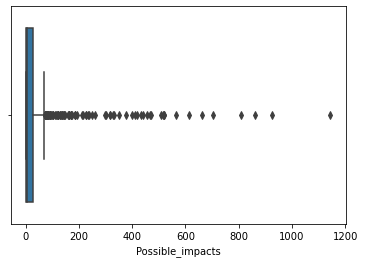

In [10]:
sns.boxplot(df.Possible_impacts)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='asteroid_vel', ylabel='Density'>

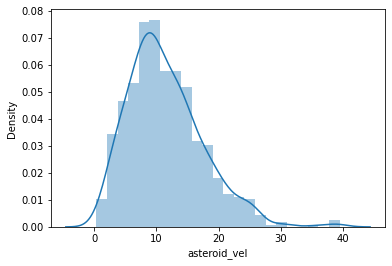

In [11]:
sns.distplot(df.asteroid_vel) 

In [12]:
df.shape

(683, 12)

# Train Test split

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(['obj','max_torno'], axis =1 )
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=100)
X.head()

,Period_start,Period_end,Possible_impacts,C_imp_prob,asteroid_vel,asteroid_mag,asteroid_dia,C_palermo,max_palermo,impact_dang
0,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,1
1,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,1
2,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,1
3,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,1
4,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,1


# KNN

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly in

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly in

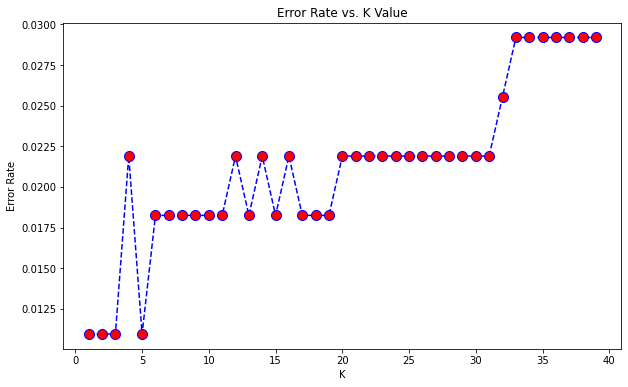

Minimum error:- 0.010948905109489093 at K = 1


In [14]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
#print (pred_i)
#print (1-accuracy_score(y_test, pred_i))
    error_rate.append(1-accuracy_score(y_test, pred_i))



plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
LR = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')



In [16]:
LR.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [17]:
print("Accuracy ", LR.score(X_test, y_test))

Accuracy  0.9890510948905109


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


# Gini

In [18]:
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier as dtree

from sklearn.tree import export_graphviz

from sklearn.tree import plot_tree

In [19]:
df = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [20]:
df.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_te = df.predict(X_test)

In [22]:
#gini accuracy
np.sum((y_test == y_te))/y_test.size  

0.9963503649635036

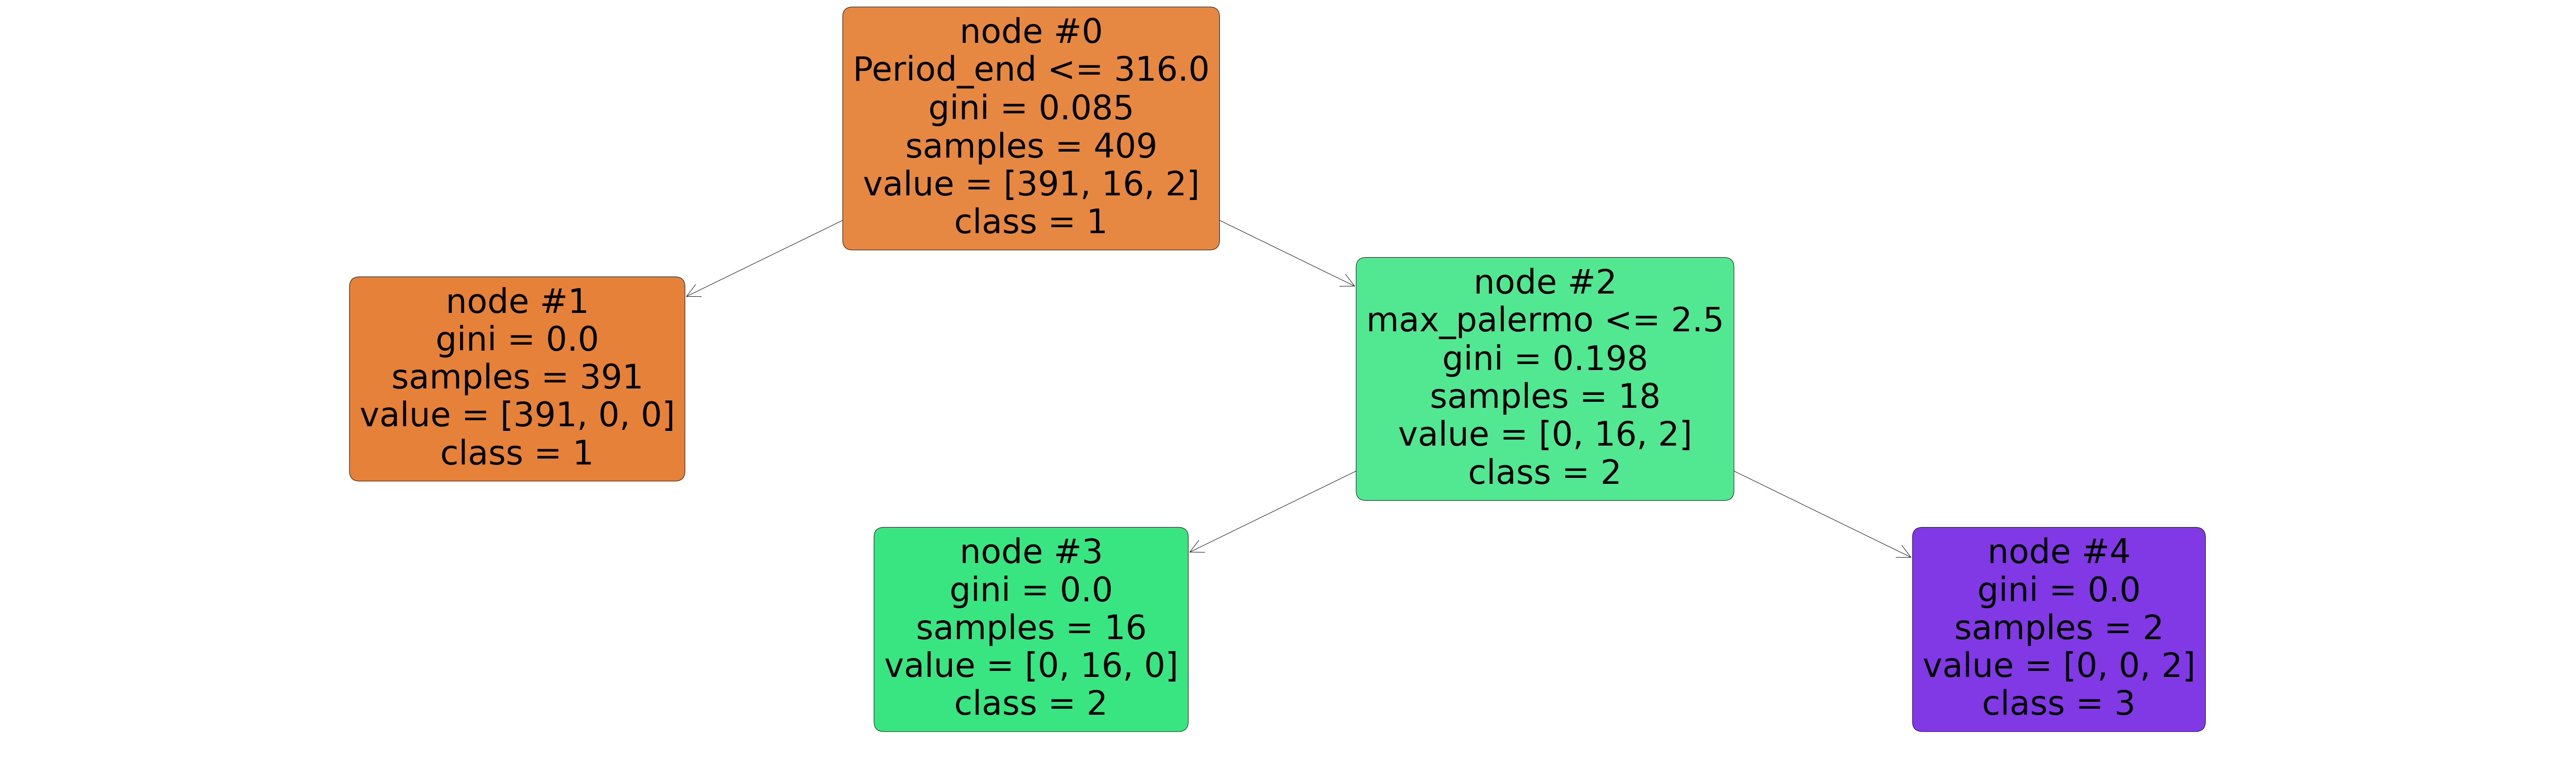

In [23]:
_=plt.figure(figsize=(100,30))
_=plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['obj','Period_start','Period_end','Possible_impacts','C_imp_prob','asteroid_vel','asteroid_mag','asteroid_dia','C_palermo','max_palermo'],
            class_names = ['1','2','3']
            )

_=plt.show()

# Entropy

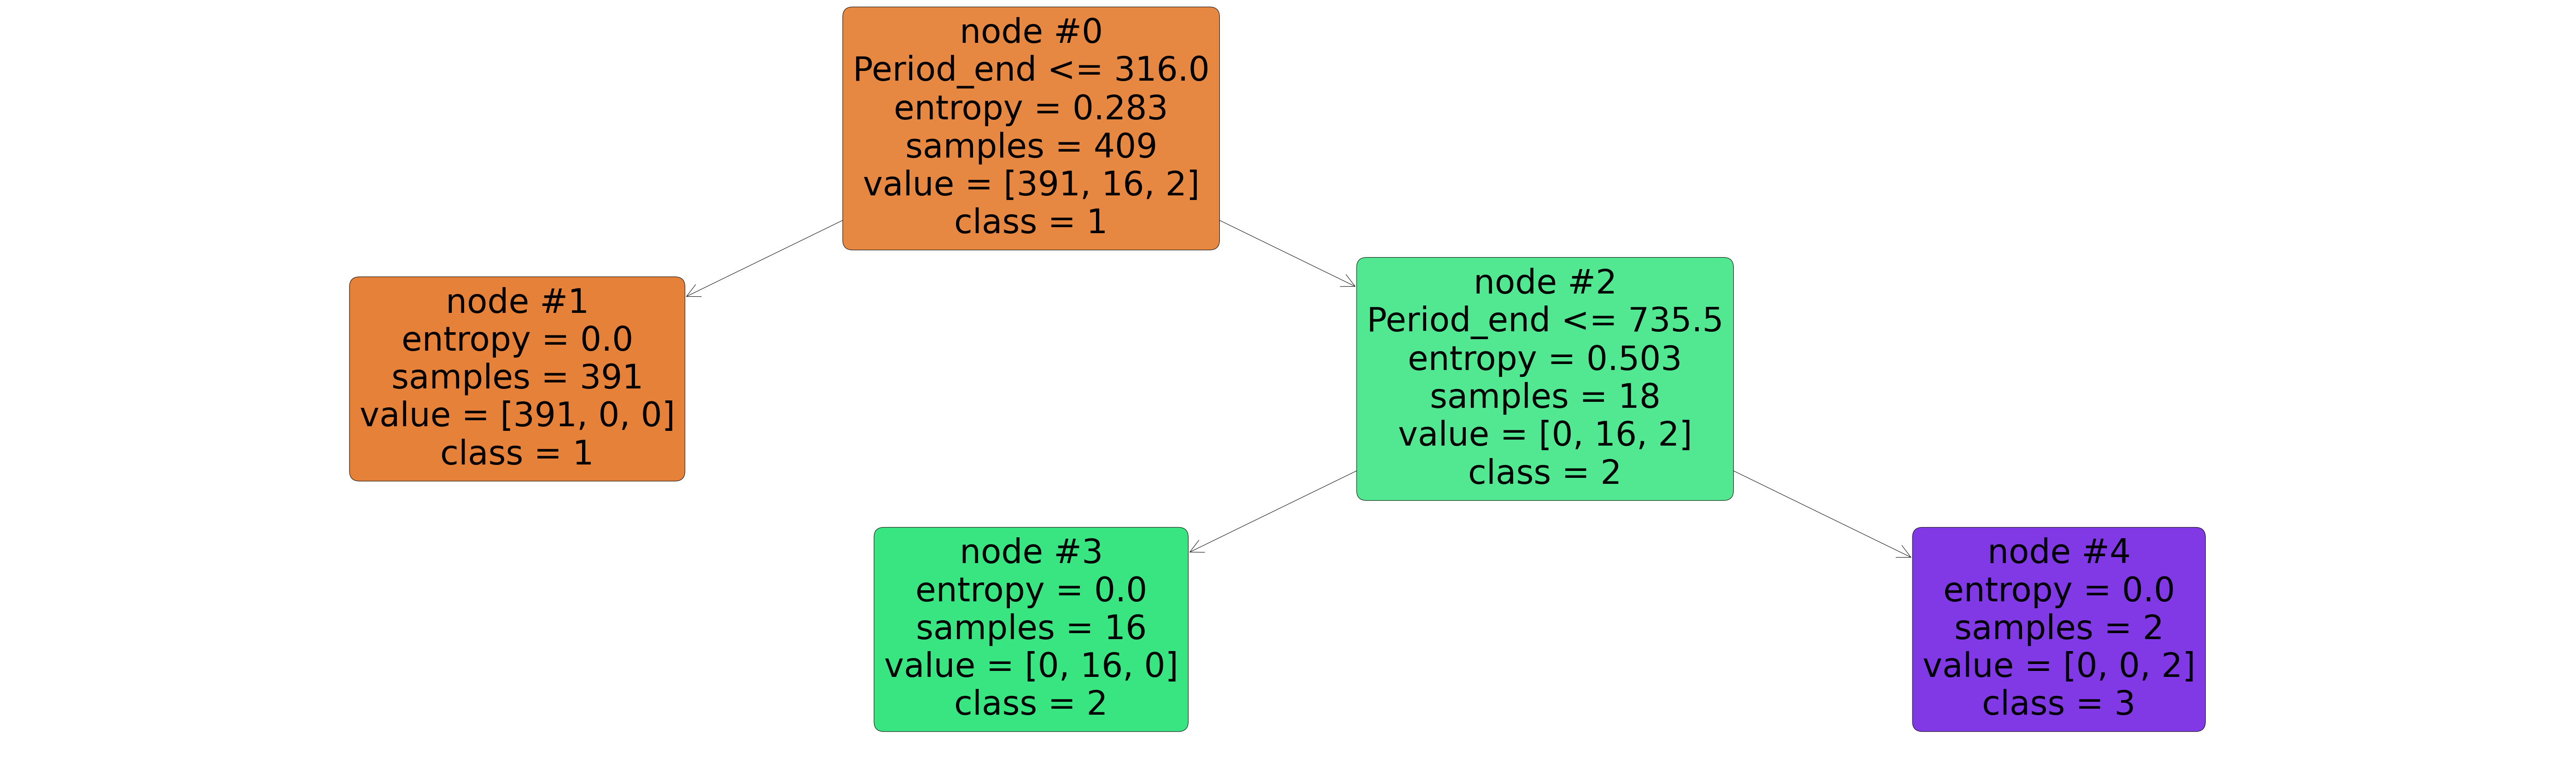

In [24]:
df = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=df.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(100,30))
_=plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['obj','Period_start','Period_end','Possible_impacts','C_imp_prob','asteroid_vel','asteroid_mag','asteroid_dia','C_palermo','max_palermo'],
            class_names = ['1','2','3']
            )

_=plt.show()

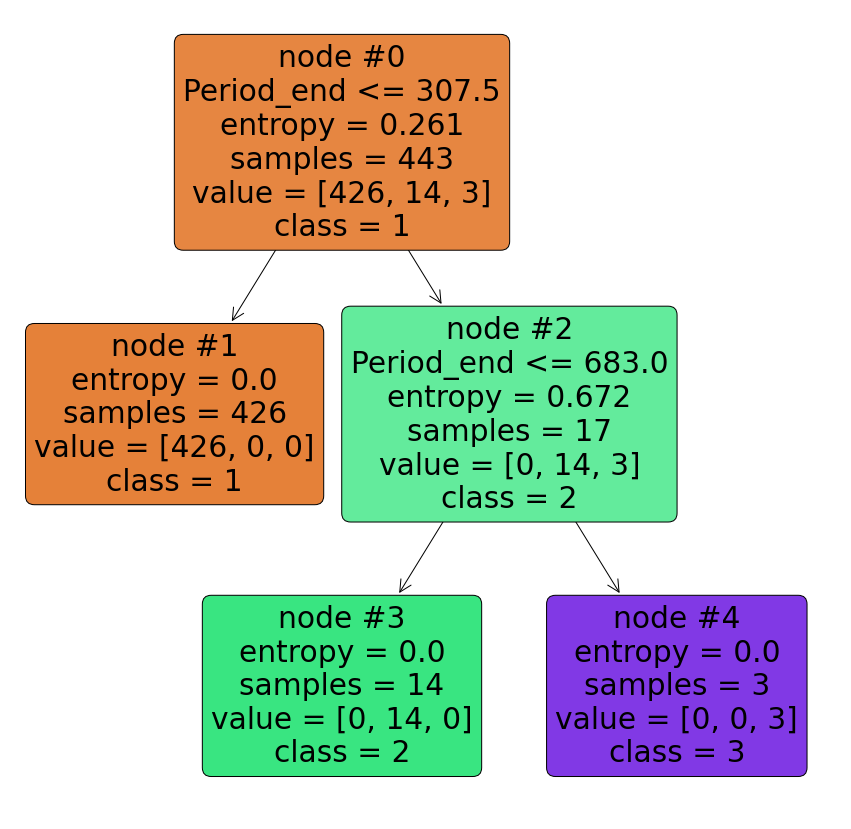

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.35,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

df = dtree(
           criterion="entropy",    
           max_depth=None       
                              
           )
##
_=df.fit(X_train,y_train)

##
_=plt.figure(figsize=(15,15))
_=plot_tree(
            df,
            max_depth = 3,  
            rounded = True, 
            filled = True,  
            impurity = True,
            node_ids = True,
            feature_names = ['obj','Period_start','Period_end','Possible_impacts','C_imp_prob','asteroid_vel','asteroid_mag','asteroid_dia','C_palermo','max_palermo'],
            class_names = ['1','2','3']
            )

_=plt.show()

In [26]:
#entropy accuracy
y_te = df.predict(X_test)
np.sum((y_test == y_te))/y_test.size 

1.0

# Random Forest

In [27]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [28]:
clf.score(X_test, y_test)

1.0

In [29]:
y_pred = clf.predict(X_test)

In [30]:
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)

[[231   0   0]
 [  0   7   0]
 [  0   0   2]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         2

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [32]:
y_pred = clf.predict(X_test)

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [34]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy score is: ", accuracy_score(y_test, y_pred))

[[231   0   0]
 [  0   7   0]
 [  0   0   2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         2

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Accuracy score is:  1.0


Text(33.0, 0.5, 'Actual')

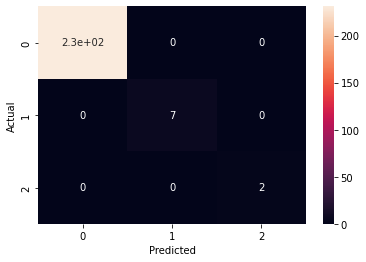

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Conclusion
### KNN Accuracy: 0.9817518248175182
### Gini Accuracy: 1.0
### Entropy Accuracy: 1.0
### Random Forest Accuracy: 0.9958333333333333

### Hence based on the accuracy obtained we can see that D-tree (entropy) has the best accuracy for this dataset

# Overfitting and underfitting checks

In [36]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [37]:
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, X, y,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)

In [38]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

Text(0.5, 1.0, 'Train and test errors distribution via cross-validation')

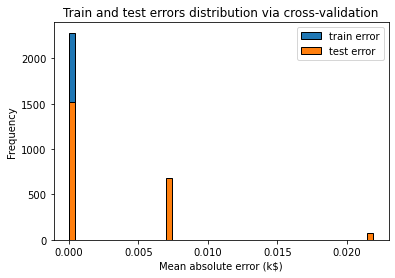

In [39]:
import matplotlib.pyplot as plt

scores.plot.hist(bins=50, edgecolor="black", density=True)
plt.xlabel("Mean absolute error (k$)")
plt.title("Train and test errors distribution via cross-validation")

In [40]:
from sklearn.model_selection import validation_curve

max_depth = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(regressor, X, y, param_name="max_depth", param_range=max_depth,cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

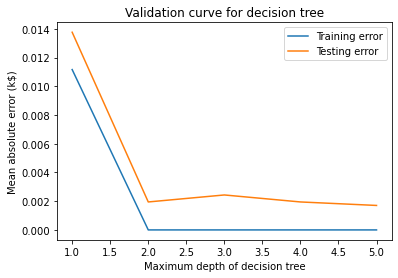

In [41]:
plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

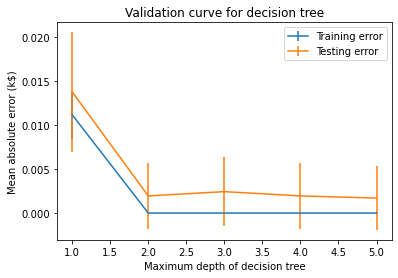

In [42]:
plt.errorbar(max_depth, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label='Training error')
plt.errorbar(max_depth, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label='Testing error')
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")